# Clustering Geolocation Data

Dataset of taxi locations: *taxi_data.csv*

Define key clusters of these taxis.

**Conclusion**: Service stations can be build, on clusters centroid, for all taxis operating in that region.

## Project Outline

**Task 1**: Exploratory Data Analysis

**Task 2**: Visualizing Geographical Data

**Task 3**: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**Bonus Task (not done)**: HDBSCAN (Hierarchical DBSCAN)


In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

import folium

import hdbscan

import re

from tqdm import tqdm

from ipywidgets import interactive

from collections import defaultdict





plt.style.use('ggplot')

cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
        '#000075', '#808080']*10

print('Libraries Imported')

Libraries Imported


# Task 1: Exploratory Data Analysis

Import taxi dataset:

In [2]:
df_taxi = pd.read_csv('taxi_data.csv')
df_taxi.head()


,LON,LAT,NAME
0,28.17858,-25.73882,11th Street Taxi Rank
1,28.17660,-25.73795,81 Bazaar Street Taxi Rank
2,27.83239,-26.53722,Adams Road Taxi Rank
3,28.12514,-26.26666,Alberton City Mall Taxi Rank
4,28.10144,-26.10567,Alexandra Main Taxi Rank


In [3]:
df_taxi.dtypes

LON     float64
LAT     float64
NAME     object
dtype: object

Check missing values:

In [4]:
print('Dataset with NaNs values? ->', df_taxi.isna().values.any())


Dataset with NaNs values? -> True


In [5]:
print('Before dropping NaN:', df_taxi.shape)

df_taxi.dropna(inplace=True)
print('After dropping NaN:', df_taxi.shape)

Before dropping NaN: (838, 3)
After dropping NaN: (837, 3)


Check duplicate values:

In [6]:
print('Dataset with Geolocation duplicates? ->', df_taxi.duplicated(subset=['LON', 'LAT']).values.any())

Dataset with Geolocation duplicates? -> True


In [7]:
print('Before dropping duplicates:', df_taxi.shape)

df_taxi.drop_duplicates(subset=['LON', 'LAT'], keep='first', inplace=True)
print('After dropping duplicates:', df_taxi.shape)

Before dropping duplicates: (837, 3)
After dropping duplicates: (823, 3)


Scatter plot geolocation data:

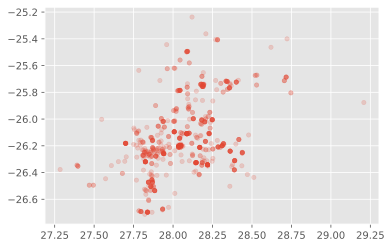

In [8]:
plt.scatter(df_taxi.LON, df_taxi.LAT, alpha=0.2, s=20)

# Task 2: Visualizing Geographical Data


Plot taxi data in b&w map for easy visualization:

In [9]:
taxi_map = folium.Map(location=[df_taxi.LAT.mean(), df_taxi.LON.mean()], zoom_start=9, tiles='Stamen Toner')

for _, row in df_taxi.iterrows():
    folium.CircleMarker(
        location=[row.LAT, row.LON],
        radius=5,
        color='blue',
        fill=True,
        fill_colour='blue'
    ).add_to(taxi_map)


In [10]:
taxi_map

Defining function to create map on the next task:

In [11]:
def create_map(df, cluster_column):
    cluster_map = folium.Map(location=[df.LAT.mean(), df.LON.mean()], zoom_start=9, tiles='Stamen Toner')

    for _, row in df.iterrows():
        if row[cluster_column] == -1:
            cluster_colour = '#000000'
        else:
            cluster_colour = cols[row[cluster_column]]

        folium.CircleMarker(
            location= [row['LAT'], row['LON']],
            radius=5,
            popup= row[cluster_column],
            color=cluster_colour,
            fill=True,
            fill_color=cluster_colour
        ).add_to(cluster_map)
        
    return cluster_map

# Task 3: DBSCAN 

In [22]:
model1 = DBSCAN(eps=0.01, min_samples=5).fit(df_taxi[['LON', 'LAT']])
class_predictions1 = model1.labels_

df_taxi['CLUSTERS_DBSCAN'] = class_predictions1


In [23]:
cluster_map1 = create_map(df_taxi, 'CLUSTERS_DBSCAN')
    
print('Number of clusters found:', len(np.unique(class_predictions1)))
print('Number of outliers found:', len(class_predictions1[class_predictions1==-1]))
print('Silhouette ignoring outliers:', silhouette_score(df_taxi[['LON', 'LAT']][class_predictions1!=-1], class_predictions1[class_predictions1!=-1]))

cluster_map1

Number of clusters found: 51
Number of outliers found: 289
Silhouette ignoring outliers: 0.9232138250288208


# Bonus Task: HDBSCAN

In [24]:
model2 = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, cluster_selection_epsilon=0.01)

#fit_predict instead of fit, so that it returns labels 
class_predictions2 = model.fit_predict(df_taxi[['LON', 'LAT']])
df_taxi['CLUSTER_HDBSCAN'] = class_predictions2


In [25]:
cluster_map2 = create_map(df_taxi, 'CLUSTER_HDBSCAN')
    
print('Number of clusters found:', len(np.unique(class_predictions2)))
print('Number of outliers found:', len(class_predictions2[class_predictions2==-1]))
print('Silhouette ignoring outliers:', silhouette_score(df_taxi[['LON', 'LAT']][class_predictions2!=-1], class_predictions2[class_predictions2!=-1]))

cluster_map2

Number of clusters found: 51
Number of outliers found: 289
Silhouette ignoring outliers: 0.9232138250288208
